<H2>
<B>TOPIC    :</B> PCA V/S LDA <BR>
<B><CENTER>MARKETING ANALYTICS</CENTER></B> </H2>

##<b>Importing the packages</b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  scipy import stats
plt.rc('figure',figsize=(20,10))

#Splitting the data
from sklearn.model_selection import train_test_split

#Caculating the performance
from sklearn import metrics

#Package for evaluating the model
from sklearn.metrics import classification_report,confusion_matrix

##<b>Load the data set</b>

In [ ]:
data= pd.read_csv('/content/pseudo_facebook.csv')
df=pd.read_csv('/content/pseudo_facebook.csv')
data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(99003, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

##<b>Handling the missing values</b>

In [ ]:
data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

We have the 175 null values in the gender column and 2 null values in the tenure column. We have 99003 records with 15 attributes. So, by droping the 177 null values will not effect the pattern. So, I am dropping the null values in the present data set. 

In [ ]:
data=data.dropna()
df=df.dropna()
data.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

After dropping the values there are no null values. 

In [ ]:
data.shape

(98826, 15)

##<b>Checking the categorical values in the data</b>

In [ ]:
categorical=[col for col in data.columns if data[col].dtype=='object']
for i,j in enumerate(categorical):
    print("{0}: {1} has the unique elements:{2}".format(i+1,j,data[j].unique()))

1: gender has the unique elements:['male' 'female']


So, we have only one categorical column value, in the given data set.

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
data['gender']= le.fit_transform(data['gender']) 

##<h3><b>Correlation Heatmap</h3></b>

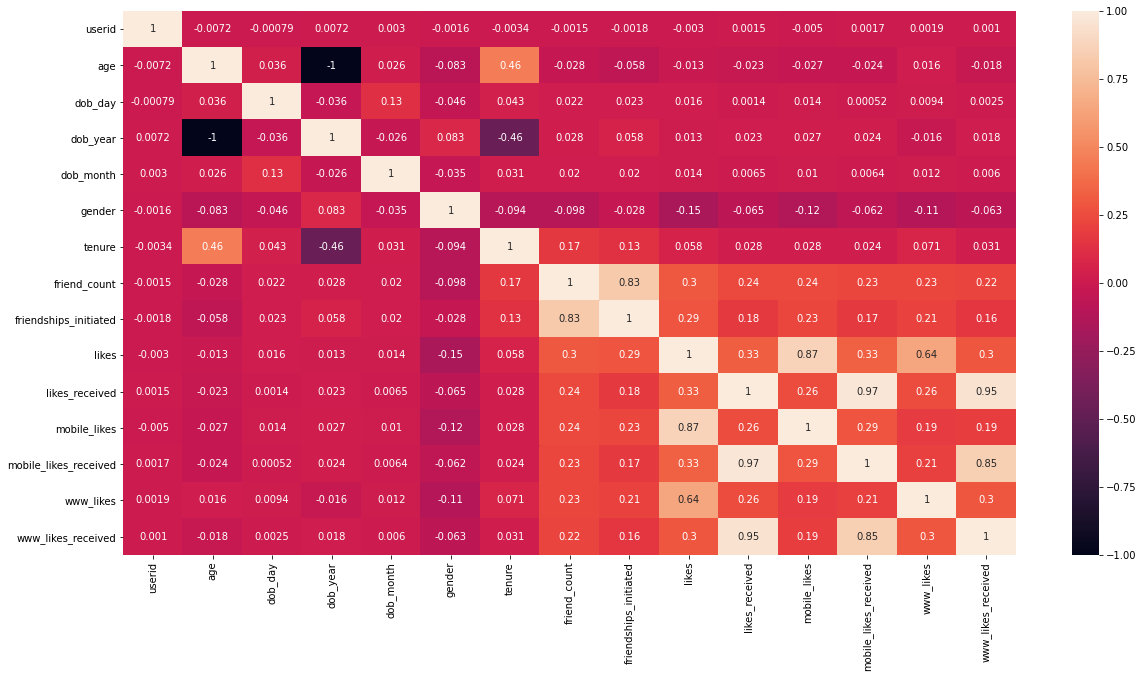

In [ ]:
sns.heatmap(data.corr('pearson'),annot=True)

<h3><i>
The age is positively related to all kinds of likes. Moreover, we donnot require the userid for predicting the age group bin so we drop the userid column. And for predicting the age group I am even dropping the age attribute. 
</h3></i>


##**LDA**

In [ ]:
labels=['13-19','20-34','35-49','50-65','over 65']
data['age_group']=pd.cut(data.age,bins=[12,19,34,49,65,data.age.max()],labels=labels,include_lowest=True)
data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,1,266.0,0,0,0,0,0,0,0,0,13-19
1,1192601,14,2,1999,11,0,6.0,0,0,0,0,0,0,0,0,13-19
2,2083884,14,16,1999,11,1,13.0,0,0,0,0,0,0,0,0,13-19
3,1203168,14,25,1999,12,0,93.0,0,0,0,0,0,0,0,0,13-19
4,1733186,14,4,1999,12,1,82.0,0,0,0,0,0,0,0,0,13-19


Text(0.5, 1.0, 'Age Distribution of Facebook Users')

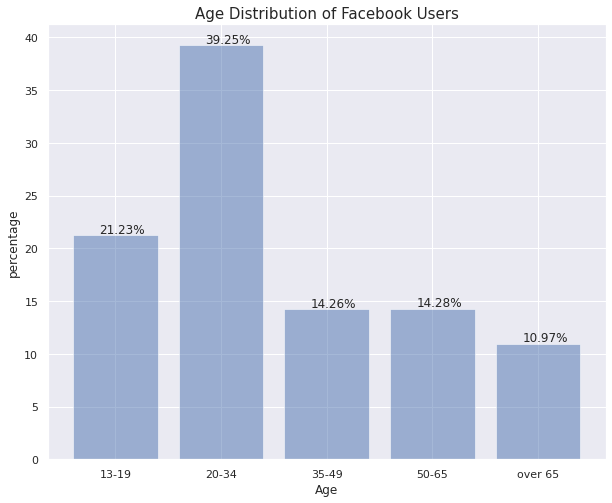

In [ ]:
sns.set()
fig,ax=plt.subplots(figsize=(10,8))
test=data.groupby("age_group")["tenure"].count()
test=test/sum(test)*100
ax.bar(test.index,test.values,alpha=0.5)
for i in ax.patches:
    ax.text(i.get_x()+0.25,i.get_height()+0.2,str(round(i.get_height(),2))+'%')
ax.set_xlabel("Age")
ax.set_ylabel("percentage")
ax.set_title("Age Distribution of Facebook Users",fontsize=15)

The people between the age group 20-30 are more likely to use facebook. The people between the age groups 13-19 are next addicted users of facebook. The people with age 3-65 use facebook at same pace. Very less ratio of people at with age >65 use facebook. 

In [ ]:
#REMOVING UNNCESSARY COLUMNS
a_data=data.iloc[:, 3:]
a_data.head()

,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,1999,11,1,266.0,0,0,0,0,0,0,0,0,13-19
1,1999,11,0,6.0,0,0,0,0,0,0,0,0,13-19
2,1999,11,1,13.0,0,0,0,0,0,0,0,0,13-19
3,1999,12,0,93.0,0,0,0,0,0,0,0,0,13-19
4,1999,12,1,82.0,0,0,0,0,0,0,0,0,13-19


###<B>SPLITTING THE DATA</B>


In [ ]:
x = a_data.drop(['age_group','gender'], axis=1)
y = a_data['age_group']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

###<B>BUILDING THE MODEL</B>

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_train = lda.fit_transform(x_train, y_train)
X_test = lda.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[ 6186   101     0     0     0]
 [  192 11384    26     0     0]
 [    0    33  4103    69     3]
 [    0   280    14  3968    23]
 [    0   652     0  1622   992]]
Accuracy0.8983067997841339


Without applying the LDA technique the data, is been overfitted the given data. (As refered in the lab2 program). By applying the LDA, we have overcome the overfitting, and generalised the model to different records of the data. 

##<b>PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
#REMOVING UNNCESSARY COLUMNS
a_data=data.iloc[:, 3:]
a_data.head()

,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,1999,11,1,266.0,0,0,0,0,0,0,0,0,13-19
1,1999,11,0,6.0,0,0,0,0,0,0,0,0,13-19
2,1999,11,1,13.0,0,0,0,0,0,0,0,0,13-19
3,1999,12,0,93.0,0,0,0,0,0,0,0,0,13-19
4,1999,12,1,82.0,0,0,0,0,0,0,0,0,13-19


In [ ]:
x = a_data.drop(['age_group','gender'], axis=1)
y = a_data['age_group']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([3.28933800e-01, 1.74273863e-01, 1.33821469e-01, 1.24279972e-01,
       9.05191300e-02, 7.46147458e-02, 4.64922454e-02, 1.53265470e-02,
       1.17382275e-02, 4.35480533e-12, 1.35389806e-12])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[    0  6265     0    16     6]
 [    0 11281     1   308    12]
 [    0  2633   284  1256    35]
 [    0   415   220  3401   249]
 [    0   226     2   913  2125]]
Accuracy0.576463842417701


The LDA is best classification than PCA, as the LDA 89.3% whereas the  PCA gives 57.6%. 